#networkx
###networkx is the library used for Network analysis in python 







In [5]:
import networkx as nx
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2
%matplotlib inline

###Reading edge list and nodes data 
This data set is directed network of 29 seventh grade students. A node represents a student and contains the information of their gender. An edge between two nodes shows that the left student picked the right student as a friend with weights between 1 and 3.The edge weights are between 1 and 3 and show how often the left student chose the right student as his favourite  


In [3]:
# Read the edge list 
df = pd.read_csv('out.moreno_seventh_seventh',skiprows=2, header=None, sep=' ')
df.columns = ['student1', 'student2', 'count']

# Read the node metadata 
meta = pd.read_csv('ent.moreno_seventh_seventh.student.gender',header=None)
meta.index += 1
meta.columns = ['gender']

### nx.DiGraph() for creating directed graph and nx.Graph() for crating undirected graph 

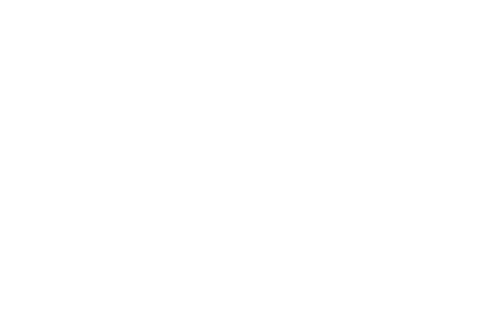

In [6]:
# create an empty directed graoh 
G = nx.DiGraph()
nx.draw(G)


### Add Edges and nodes to the empty graph ( G.add_node() , G.add_edge() ) Drawing Graphs draw() is used

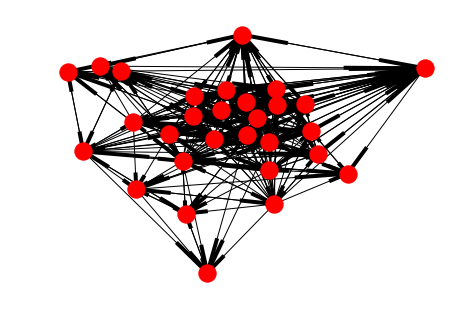

In [9]:
for row in df.iterrows():
  G.add_edge(row[1]['student1'], row[1]['student2'],count=row[1]['count'])
 
# Add node metadata
for n in G.nodes():
  G.node[n]['gender'] = meta.ix[n]['gender']

nx.draw(G)


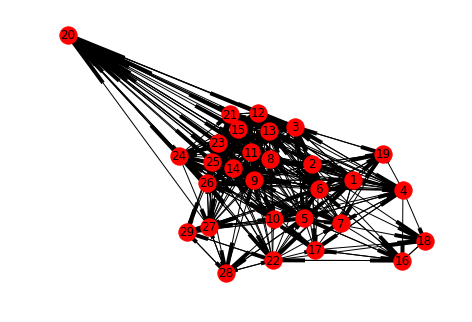

In [10]:
nx.draw(G, with_labels=True)

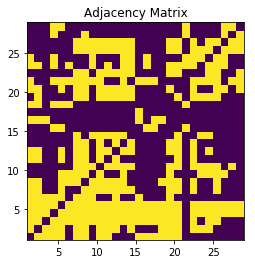

In [11]:
matrix = nx.to_numpy_matrix(G)

plt.pcolor(np.array(matrix))
plt.axes().set_aspect('equal') # set aspect ratio equal to get a square visualization
plt.xlim(min(G.nodes()), max(G.nodes())) # set x and y limits to the number of nodes present.
plt.ylim(min(G.nodes()), max(G.nodes()))
plt.title('Adjacency Matrix')
plt.show()

##Data Representation

In the networkx implementation, graph objects store their data in dictionaries.

Nodes are part of the attribute Graph.node, which is a dictionary where the key is the node ID and the values are a dictionary of attributes.



In [14]:
# G.nodes()
len(G.nodes()) 


29

In [13]:
#G.edges() 
len(G.edges())

376

#Both nodes and edges can have attributes : 
Let's get a list of nodes and edges with their attributes.


In [15]:
G.nodes(data=True)


[(1, {'gender': 'male'}),
 (2, {'gender': 'male'}),
 (3, {'gender': 'male'}),
 (4, {'gender': 'male'}),
 (5, {'gender': 'male'}),
 (6, {'gender': 'male'}),
 (7, {'gender': 'male'}),
 (8, {'gender': 'female'}),
 (9, {'gender': 'female'}),
 (10, {'gender': 'female'}),
 (11, {'gender': 'female'}),
 (12, {'gender': 'female'}),
 (13, {'gender': 'female'}),
 (14, {'gender': 'female'}),
 (15, {'gender': 'female'}),
 (16, {'gender': 'male'}),
 (17, {'gender': 'male'}),
 (18, {'gender': 'male'}),
 (19, {'gender': 'male'}),
 (20, {'gender': 'female'}),
 (21, {'gender': 'female'}),
 (22, {'gender': 'male'}),
 (23, {'gender': 'female'}),
 (24, {'gender': 'female'}),
 (25, {'gender': 'female'}),
 (26, {'gender': 'female'}),
 (27, {'gender': 'female'}),
 (28, {'gender': 'female'}),
 (29, {'gender': 'female'})]

In [ ]:
G.edges(data=True)

# Centrality 
###Centrality measures address the question:
##"Who is the most important or central person in this network?"
There are many answers to this question, depending on what we mean by importance.

There are different centrality measures that have been proposed over the years.

###1) Degree Centrality 

###Degree : The degree of a node of a graph is the number of edges incident to the node.( Number of neighbors of a node ) 





In [16]:
# Let's find out the number of neighbors that individual #7 has.
len(G.neighbors(7))

12

###The nodes with higher degree is more central.

NetworkX implements a degree centrality, which is defined as the number of neighbors that a node has normalized to the number of individuals it could be connected to in the entire graph. 

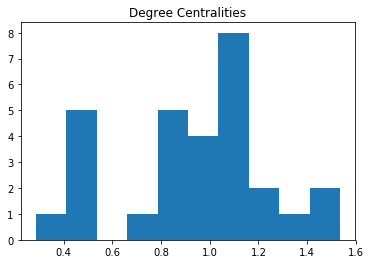

In [17]:
nx.degree_centrality(G)

# Histogram of degree_centralities 
fig = plt.figure(0)
# Get a list of degree centrality scores for all of the nodes.
degree_centralities = list(nx.degree_centrality(G).values())
# Plot the histogram of degree centralities.
plt.hist(degree_centralities)
# Set the plot title. 
plt.title('Degree Centralities')



###2) Closeness Centrality 

Farness : The farness/peripherality of a node v is defined as the sum of its distances to all other nodes. The closeness is defined as the inverse of the farness.

The more central a node is, the lower its total distance to all other nodes.






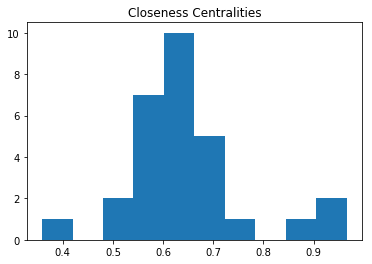

In [18]:
# Histogram of degree_centralities 
fig = plt.figure(1)
# Get a list of degree centrality scores for all of the nodes.
closeness_centralities = list(nx.closeness_centrality(G).values())
# Plot the histogram of degree centralities.
plt.hist(closeness_centralities)
# Set the plot title. 
plt.title('Closeness Centralities')


### 3) Betweenness Centrality 

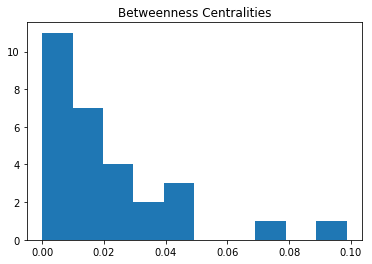

In [19]:
# Histogram of degree_centralities 
fig = plt.figure(2)
# Get a list of degree centrality scores for all of the nodes.
betweenness_centralities = list(nx.betweenness_centrality(G).values())
# Plot the histogram of degree centralities.
plt.hist(betweenness_centralities)
# Set the plot title. 
plt.title('Betweenness Centralities')

#Paths in a Network
Graph traversal is akin to walking along the graph, node by node, restricted by the edges that connect the nodes. Graph traversal is particularly useful for understanding the local structure (e.g. connectivity, retrieving the exact relationships) of certain portions of the graph and for finding paths that connect two nodes in the network.
Using the synthetic social network, we will figure out how to answer the following questions:

1)How long will it take for a message to spread through this group of friends? (making some assumptions, of course)

2)How do we find the shortest path to get from individual A to individual B?

###Networkx has a function has_path to see if there is a path between two nodes 

In [21]:
nx.has_path(G, 27, 1)

True

### NetworkX also has other shortest path algorithms implemented.

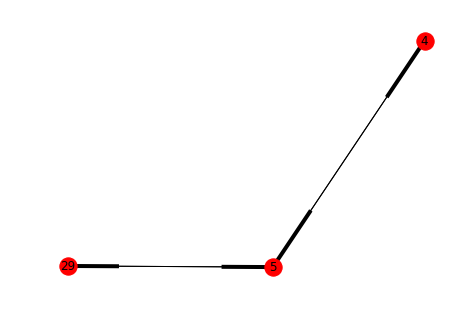

In [23]:
nx.shortest_path(G, 4, 29)

# function to extract shortest path from a network 


def extract_path_edges(G, source, target):
    # Check to make sure that a path does exists between source and target.
    if nx.has_path(G, source, target):
        nodes = nx.shortest_path(G, source, target)
        newG = G.subgraph(nodes)
        return newG

    else:
        raise Exception('Path does not exist between nodes {0} and {1}.'.format(source, target))
        
newG = extract_path_edges(G, 4, 29)
nx.draw(newG, with_labels=True)

